In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [5]:
train_set = pd.read_csv('loan_train.csv')
train_set.head()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,Male,No,0,Graduate,No,584900,0.0,15000000,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,458300,150800.0,12800000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,300000,0.0,6600000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,258300,235800.0,12000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,600000,0.0,14100000,360.0,1.0,Urban,Y


In [6]:
test_set = pd.read_csv('loan_test.csv')
test_set.head()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area
0,Male,Yes,0,Graduate,No,572000,0,11000000,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,307600,150000,12600000,360.0,1.0,Urban
2,Male,Yes,2,Graduate,No,500000,180000,20800000,360.0,1.0,Urban
3,Male,Yes,2,Graduate,No,234000,254600,10000000,360.0,NaN,Urban
4,Male,No,0,Not Graduate,No,327600,0,7800000,360.0,1.0,Urban


In [7]:
print(train_set.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              601 non-null    object 
 1   Married             611 non-null    object 
 2   Dependents          599 non-null    object 
 3   Education           614 non-null    object 
 4   Self_Employed       582 non-null    object 
 5   Applicant_Income    614 non-null    int64  
 6   Coapplicant_Income  614 non-null    float64
 7   Loan_Amount         614 non-null    int64  
 8   Term                600 non-null    float64
 9   Credit_History      564 non-null    float64
 10  Area                614 non-null    object 
 11  Status              614 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 57.7+ KB
None


check nan values

In [9]:
print(train_set.isnull().sum())

Gender                13
Married                3
Dependents            15
Education              0
Self_Employed         32
Applicant_Income       0
Coapplicant_Income     0
Loan_Amount            0
Term                  14
Credit_History        50
Area                   0
Status                 0
dtype: int64


In [10]:
print(test_set.isnull().sum())

Gender                11
Married                0
Dependents            10
Education              0
Self_Employed         23
Applicant_Income       0
Coapplicant_Income     0
Loan_Amount            0
Term                   6
Credit_History        29
Area                   0
dtype: int64


In [22]:
train_set_cleaned = train_set.dropna()
print(train_set_cleaned.isnull().sum())

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
Applicant_Income      0
Coapplicant_Income    0
Loan_Amount           0
Term                  0
Credit_History        0
Area                  0
Status                0
dtype: int64


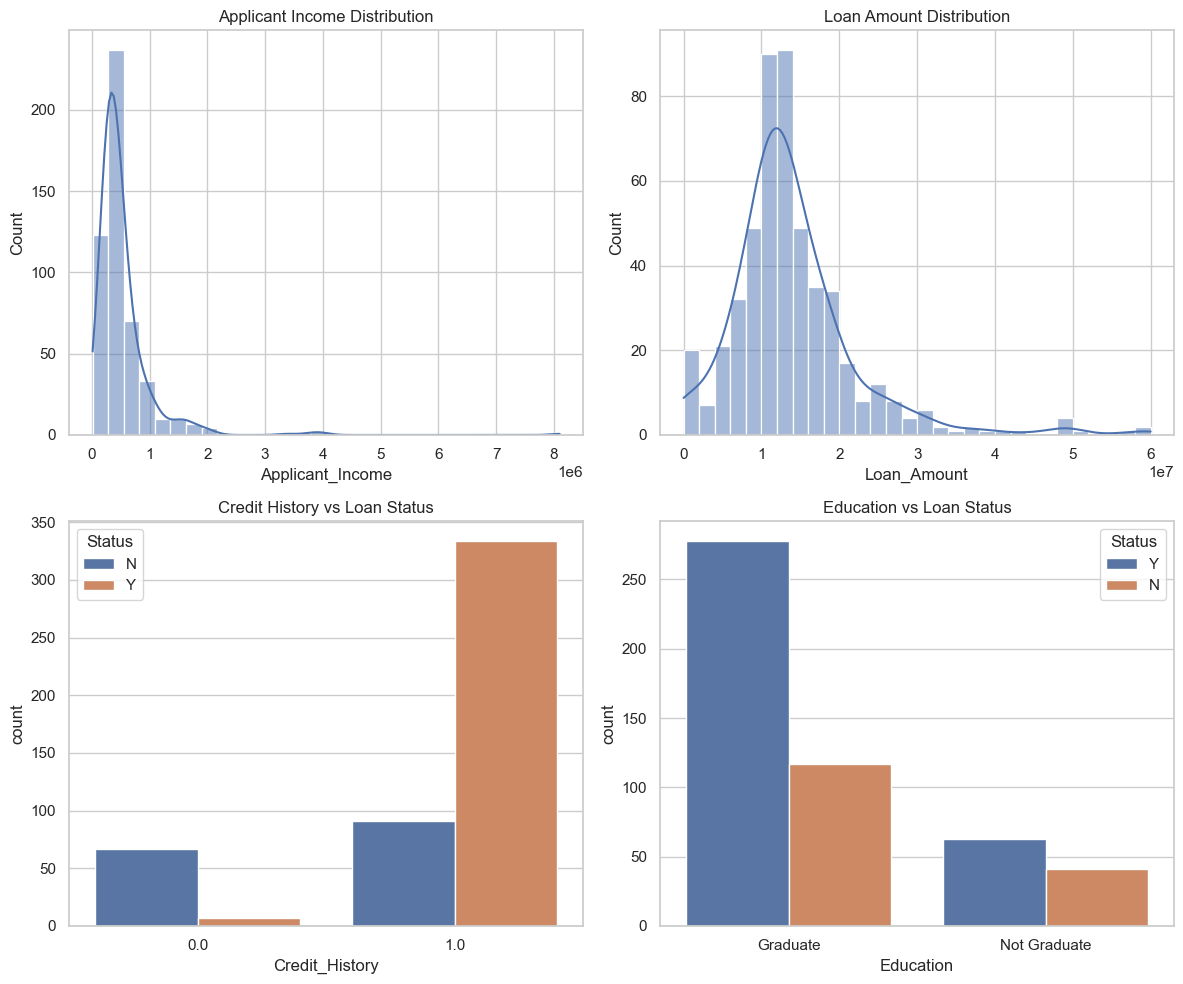

In [23]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.histplot(train_set_cleaned['Applicant_Income'], bins=30, kde=True)
plt.title('Applicant Income Distribution')

plt.subplot(2, 2, 2)
sns.histplot(train_set_cleaned['Loan_Amount'], bins=30, kde=True)
plt.title('Loan Amount Distribution')

plt.subplot(2, 2, 3)
sns.countplot(x='Credit_History', hue='Status', data=train_set_cleaned)
plt.title('Credit History vs Loan Status')

plt.subplot(2, 2, 4)
sns.countplot(x='Education', hue='Status', data=train_set_cleaned)
plt.title('Education vs Loan Status')

plt.tight_layout()
plt.show()

Encoding categorical string values into numerical

In [33]:
categorical_columns = ['Gender', 'Married', 'Education', 'Self_Employed', 'Credit_History', 'Dependents','Area', 'Status']

In [34]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label_encoder

LabelEncoder()

In [35]:
train = train_set_cleaned.copy()

In [36]:
for col in categorical_columns:
    train[col] = label_encoder.fit_transform(train[col].astype(str))
    mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
    print(f"{col} mapping: {mapping}")
    

Gender mapping: {'Female': 0, 'Male': 1}
Married mapping: {'No': 0, 'Yes': 1}
Education mapping: {'Graduate': 0, 'Not Graduate': 1}
Self_Employed mapping: {'No': 0, 'Yes': 1}
Credit_History mapping: {'0.0': 0, '1.0': 1}
Dependents mapping: {'0': 0, '1': 1, '2': 2, '3+': 3}
Area mapping: {'Rural': 0, 'Semiurban': 1, 'Urban': 2}
Status mapping: {'N': 0, 'Y': 1}


In [37]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,1,0,0,0,0,584900,0.0,15000000,360.0,1,2,1
1,1,1,1,0,0,458300,150800.0,12800000,360.0,1,0,0
2,1,1,0,0,1,300000,0.0,6600000,360.0,1,2,1
3,1,1,0,1,0,258300,235800.0,12000000,360.0,1,2,1
4,1,0,0,0,0,600000,0.0,14100000,360.0,1,2,1


In [38]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
Index: 499 entries, 0 to 613
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              499 non-null    int32  
 1   Married             499 non-null    int32  
 2   Dependents          499 non-null    int32  
 3   Education           499 non-null    int32  
 4   Self_Employed       499 non-null    int32  
 5   Applicant_Income    499 non-null    int64  
 6   Coapplicant_Income  499 non-null    float64
 7   Loan_Amount         499 non-null    int64  
 8   Term                499 non-null    float64
 9   Credit_History      499 non-null    int32  
 10  Area                499 non-null    int32  
 11  Status              499 non-null    int32  
dtypes: float64(2), int32(8), int64(2)
memory usage: 35.1 KB
None


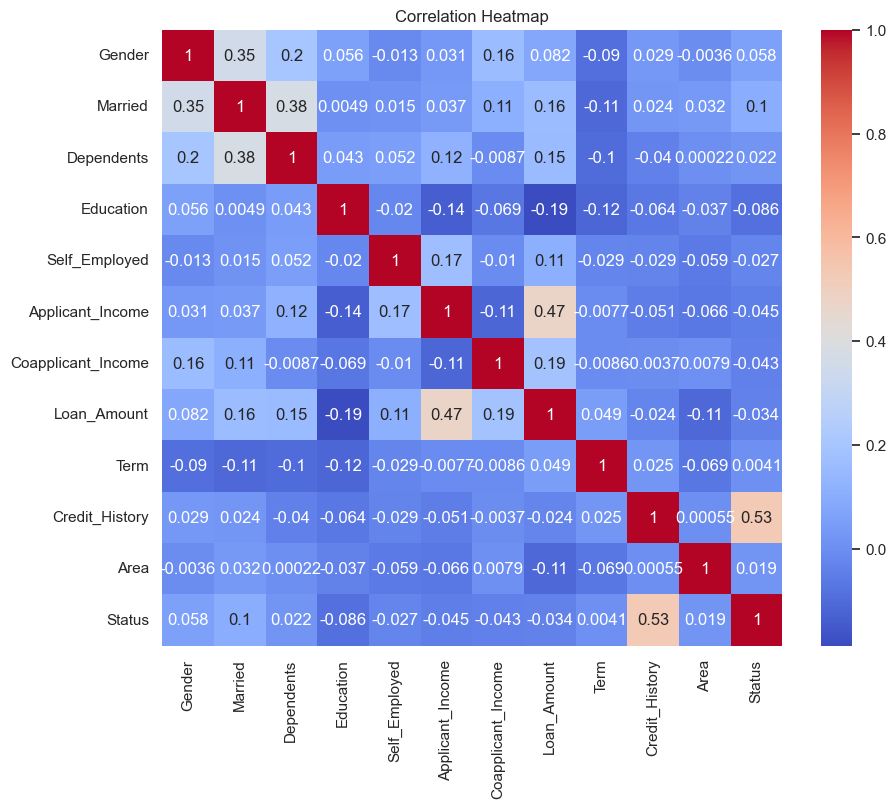

In [67]:
plt.figure(figsize=(10, 8))
sns.heatmap(train.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# optimization with pso

In [135]:
from sklearn.model_selection import cross_val_score
import pyswarms as ps
from sklearn.ensemble import RandomForestClassifier

In [136]:
X = train.drop('Status', axis=1)
y = train['Status']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)
len(X_train),len(X_val)

(349, 150)

In [138]:
X_train_ = X_train.values
y_train_ = y_train.values

In [139]:
def fitness_func(mask, alpha=0.98):
  
    n_particles = mask.shape[0]
    costs = []
    
    for i in range(n_particles):
        m = mask[i] 
        
       
        if np.count_nonzero(m) == 0:
            costs.append(1.0)
            continue
        
      
        X_subset = X_train_[:, m == 1]
        
        clf = RandomForestClassifier(n_estimators=100, random_state=42)
       
        accuracy = cross_val_score(clf, X_subset, y_train_, cv=3).mean()
        
        num_features = X_train_.shape[1]
        num_selected = np.count_nonzero(m)
        
        cost = alpha * (1 - accuracy) + (1 - alpha) * (num_selected / num_features)
        costs.append(cost)
        
    return np.array(costs)

Clerc & Kennedy option


In [140]:
options = {'c1': 0.5, 'c2': 0.5, 'w': 0.9, 'k': 3, 'p': 2}
dimensions = X.shape[1]
dimensions

11

In [141]:
optimizer = ps.discrete.BinaryPSO(n_particles=50, dimensions=dimensions, options=options)
optimizer

In [142]:
cost, pos = optimizer.optimize(fitness_func, iters=100)


2026-02-02 21:51:03,170 - pyswarms.discrete.binary - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.5, 'w': 0.9, 'k': 3, 'p': 2}
pyswarms.discrete.binary: 100%|██████████|100/100, best_cost=0.201
2026-02-02 22:20:31,527 - pyswarms.discrete.binary - INFO - Optimization finished | best cost: 0.2013033964758103, best pos: [0 0 0 0 0 0 0 0 0 1 0]


In [143]:
pos , cost

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]), 0.2013033964758103)

In [144]:
feature_names = train.drop('Status', axis=1).columns
selected_features = feature_names[pos == 1].tolist()
print(f'Best Fitness score: {cost}')
print(f'Number of selected features: {len(selected_features)}')
print(f'selected features index: {np.where(pos == 1)[0]}')
print(f'selected features: {selected_features}')


Best Fitness score: 0.2013033964758103
Number of selected features: 1
selected features index: [9]
selected features: ['Credit_History']


In [145]:
final_clf = RandomForestClassifier(n_estimators=100, random_state=42)
final_clf.fit(X_train[selected_features], y_train)


RandomForestClassifier(random_state=42)

In [146]:
from sklearn.metrics import accuracy_score, classification_report
y_pred = final_clf.predict(X_val[selected_features])
final_acc = accuracy_score(y_val, y_pred)


In [147]:
print(f'Accuracy: {final_acc}')
print(classification_report(y_val, y_pred))


Accuracy: 0.82
              precision    recall  f1-score   support

           0       0.94      0.56      0.70        57
           1       0.78      0.98      0.87        93

    accuracy                           0.82       150
   macro avg       0.86      0.77      0.79       150
weighted avg       0.84      0.82      0.81       150



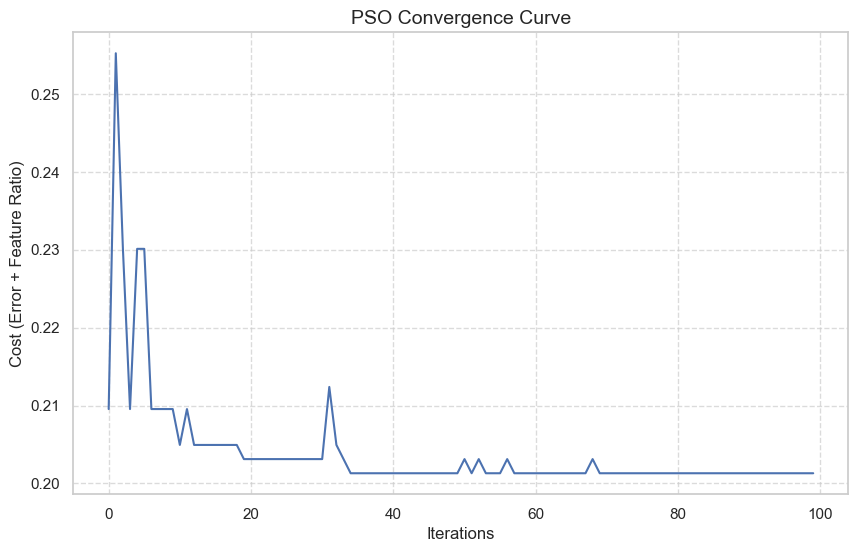

In [148]:
plt.figure(figsize=(10, 6))
plt.plot(optimizer.cost_history)
plt.title("PSO Convergence Curve", fontsize=14)
plt.xlabel("Iterations", fontsize=12)
plt.ylabel("Cost (Error + Feature Ratio)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# optimization with GA

In [149]:
X = train.drop('Status', axis=1)
y = train['Status']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

In [150]:
from deap import base, creator, tools, algorithms
import random
creator.create("FitnessMin", base.Fitness, weights=(-1.0,)) 
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()
toolbox.register("attr_bool", random.randint, 0, 1)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, n=len(X.columns))
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

C:\Users\MSH8303\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
C:\Users\MSH8303\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [151]:
def fitness_func_pso(individual, alpha=0.98):
    if sum(individual) == 0:
        return 1.0, 
    
    selected_features = [i for i in range(len(individual)) if individual[i] == 1]
    X_subset = X_train.iloc[:, selected_features]
    
    clf = RandomForestClassifier(n_estimators=50, random_state=42)
    accuracy = cross_val_score(clf, X_subset, y_train, cv=3).mean()
    
    num_features = len(individual)
    num_selected = sum(individual)
    
    cost = alpha * (1 - accuracy) + (1 - alpha) * (num_selected / num_features)
    
    return cost,

In [152]:
toolbox.register("evaluate", fitness_func_pso)
toolbox.register("mate", tools.cxTwoPoint) 
toolbox.register("mutate", tools.mutFlipBit, indpb=0.1)
toolbox.register("select", tools.selTournament, tournsize=4)

In [153]:
population = toolbox.population(n=50) 
best = tools.HallOfFame(1)     
    
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("min", np.min)
stats.register("avg", np.mean)

pop, log = algorithms.eaSimple(population, toolbox, cxpb=0.9, mutpb=0.1, ngen=50, 
                                   stats=stats, halloffame=best, verbose=True)

gen	nevals	min     	avg     
0  	50    	0.203122	0.339438
1  	42    	0.203122	0.275339
2  	50    	0.201303	0.23836 
3  	46    	0.201303	0.218856
4  	50    	0.201303	0.204462
5  	44    	0.201303	0.203074
6  	46    	0.201303	0.201637
7  	45    	0.201303	0.202924
8  	47    	0.201303	0.205149
9  	43    	0.201303	0.204068
10 	43    	0.201303	0.208447
11 	48    	0.201303	0.221237
12 	46    	0.201303	0.202967
13 	46    	0.201303	0.203463
14 	40    	0.201303	0.20781 
15 	46    	0.201303	0.211893
16 	44    	0.201303	0.208254
17 	44    	0.201303	0.212684
18 	48    	0.201303	0.205394
19 	48    	0.201303	0.203638
20 	46    	0.201303	0.20332 
21 	46    	0.201303	0.205714
22 	48    	0.201303	0.217386
23 	46    	0.201303	0.21905 
24 	48    	0.201303	0.220991
25 	46    	0.201303	0.205133
26 	48    	0.201303	0.201485
27 	48    	0.201303	0.20293 
28 	46    	0.201303	0.220979
29 	44    	0.201303	0.20134 
30 	42    	0.201303	0.206254
31 	47    	0.201303	0.203394
32 	46    	0.201303	0.221818
33 	49    	0.2

In [154]:
best_index = best[0]
selected_features = X.columns[[i for i in range(len(best_index)) if best_index[i] == 1]].tolist()

In [155]:
print(f"Selected Features: {selected_features}")

Selected Features: ['Credit_History']


In [156]:
final_clf = RandomForestClassifier(n_estimators=100, random_state=42)
final_clf.fit(X_train[selected_features], y_train)
y_pred = final_clf.predict(X_val[selected_features])

In [157]:
print(f"Result on validation set: {accuracy_score(y_val, y_pred)}")

Result on validation set: 0.82


In [158]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.56      0.70        57
           1       0.78      0.98      0.87        93

    accuracy                           0.82       150
   macro avg       0.86      0.77      0.79       150
weighted avg       0.84      0.82      0.81       150



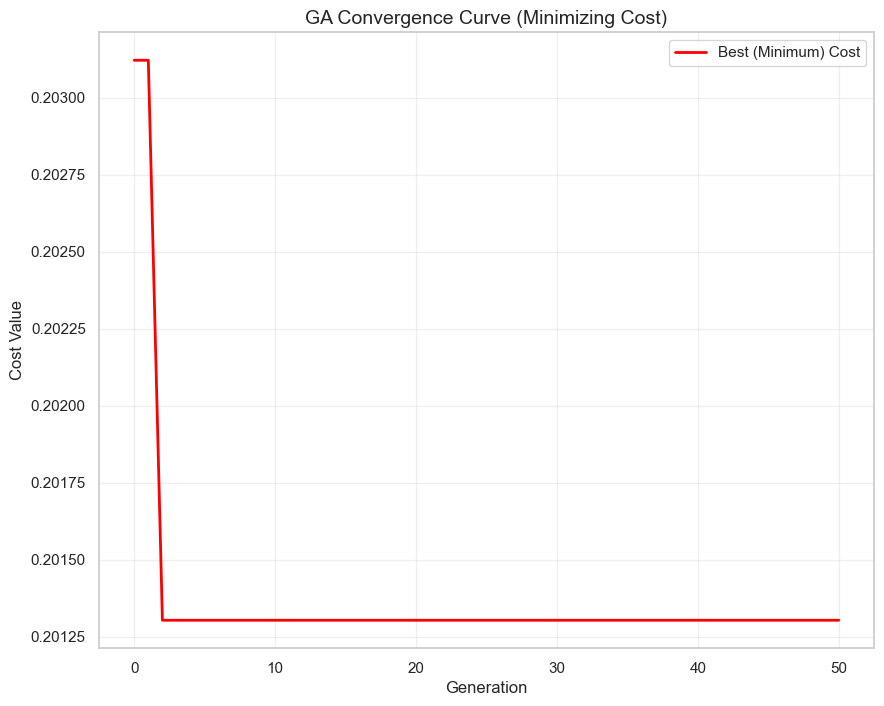

In [159]:
gen = log.select("gen")
fit_min = log.select("min")

plt.figure(figsize=(10, 8))
plt.plot(gen, fit_min, label="Best (Minimum) Cost", color="red", linewidth=2)
plt.title("GA Convergence Curve (Minimizing Cost)", fontsize=14)
plt.xlabel("Generation", fontsize=12)
plt.ylabel("Cost Value", fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Compare both together

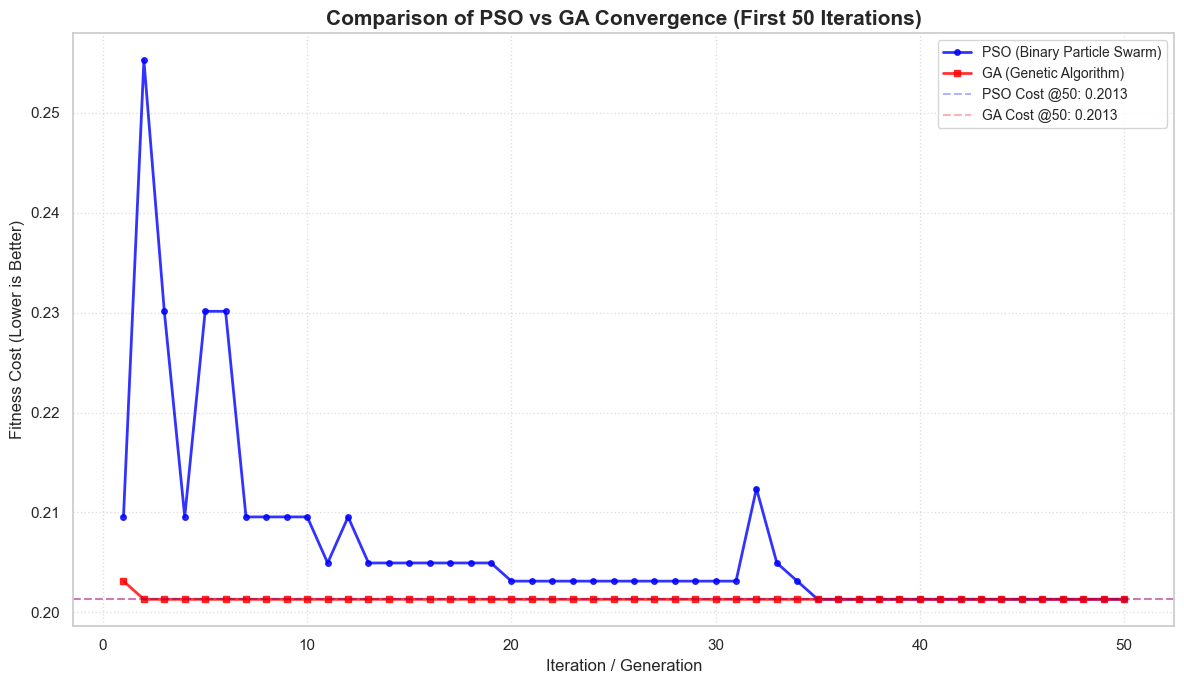

In [160]:
import matplotlib.pyplot as plt

pso_plot_data = optimizer.cost_history[:50]

ga_plot_data = log.select("min")[1:51] 

plt.figure(figsize=(12, 7))

plt.plot(range(1, 51), pso_plot_data, label='PSO (Binary Particle Swarm)', 
         color='blue', linewidth=2, marker='o', markersize=4, alpha=0.8)

plt.plot(range(1, 51), ga_plot_data, label='GA (Genetic Algorithm)', 
         color='red', linewidth=2, marker='s', markersize=4, alpha=0.8)

plt.title("Comparison of PSO vs GA Convergence (First 50 Iterations)", fontsize=15, fontweight='bold')
plt.xlabel("Iteration / Generation", fontsize=12)
plt.ylabel("Fitness Cost (Lower is Better)", fontsize=12)

plt.axhline(y=pso_plot_data[-1], color='blue', linestyle='--', alpha=0.3, label=f'PSO Cost @50: {pso_plot_data[-1]:.4f}')
plt.axhline(y=ga_plot_data[-1], color='red', linestyle='--', alpha=0.3, label=f'GA Cost @50: {ga_plot_data[-1]:.4f}')

plt.legend(loc='upper right', fontsize=10)
plt.grid(True, linestyle=':', alpha=0.6)
plt.tight_layout()

plt.show()